In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

---
**Build linear regression from scratch**

**lr(learning_rate):** Controls how much we adjust the weights in each iteration.

**n_iters(Number of Iterations):** Number of times we update the weights.

**self.weights and self.bias:** These will store the weights and bias of the model. They are initialized to None and will be set during training.

**Weights(Slope):** Coefficient for a feature in the model, indicating the feature's contribution to the prediction. In one-dimensional linear regression, the slope is the same as the weight and represents how much the target changes with a unit change in the feature.

**Intercept:** The intercept is the value of the dependent variable y when all independent variables x are zero.

**X.shape** returns the number of samples and features in X. n_samples is the number of training examples, and n_features is the number of features (or columns) in X.

**Tolerance:** The minimum change in loss required to continue iterating. If the change in loss is less than tol, we consider the model to have converged.

**Previous Loss:** initialized to a large value to ensure that the convergence check can be performed in the first iteration.

**np.dot(X, self.weights)** performs matrix multiplication to compute the linear combination of inputs and weights. Adding self.bias accounts for the intercept term.

**dw:** Gradient of the loss with respect to the weights. (y_pred - y) computes the error for each sample. np.dot(X.T, (y_pred - y)) aggregates the errors for all samples. The average gradient is found by dividing by n_samples.

**db:** Gradient of the loss with respect to the bias. np.sum(y_pred - y) sums the errors, and dividing by n_samples gives the average gradient for the bias.

Check for convergence: If the absolute change in loss between iterations is less than tol, the algorithm stops early.


In [ ]:
class Regression:
  def __init__(self, lr=0.01, n_iters=500):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None    # weight here is slope
    self.bias = None       # bias here is intercept

  def fit(self, X, y):  # fit method is used to train the model
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features) # zero vector with a length equal to the number of features.
    self.bias = 0


    tolerance = 1e-5
    prev_loss = 0

    for i in range(self.n_iters):  # number of iterations to update the weights and bias

      y_pred = self.predict(X)     # y = w.x + b

      dw = (1/n_samples) * np.dot(X.T, y_pred - y)   # gradient w.r.t weight
      db = (1/n_samples) * np.sum(y_pred - y)  # gradient w.r.t bias

      self.weights -= self.lr * dw  # learning rate scales the gradient to adjust the weights and bias.
      self.bias -= self.lr * db

      current_loss = np.mean(np.square(y_pred - y))   # Mean Absolute Error

      if abs(prev_loss - current_loss) < tolerance:
        print(f'Converged after {i+1} iterations.')
        break
      prev_loss = current_loss

  def predict(self, X):
     return np.dot(X, self.weights) + self.bias

model = Regression(lr=0.01, n_iters=500)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Salary_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
YearsExperience,0
Salary,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [ ]:
df.shape

(30, 3)

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

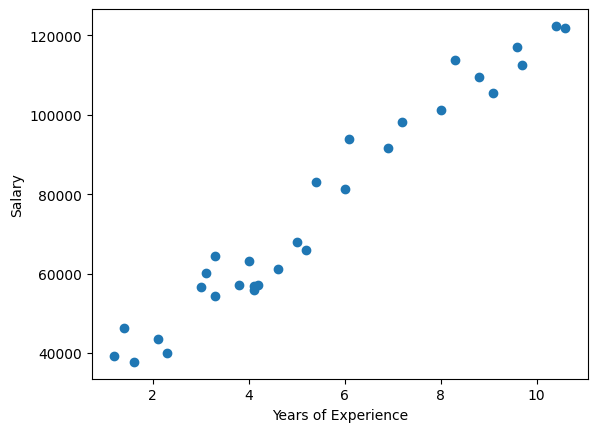

In [ ]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
X = df[['YearsExperience']]
y = df['Salary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test set: {mse}")

Mean Squared Error on test set: 64019103.16108028


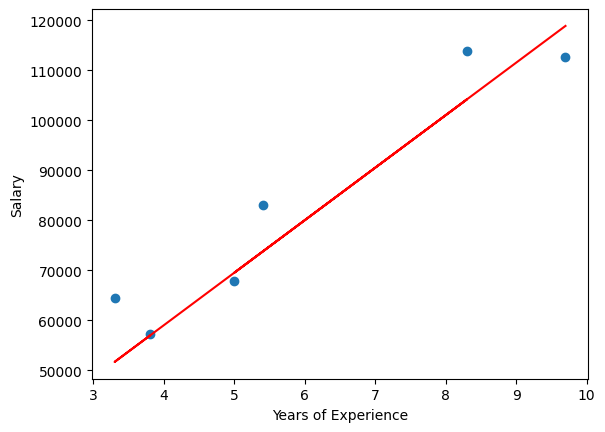

In [ ]:
# plot the regression line
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()